<div align="center">
    <h1>Biological Response Prediction using ML algorithms</h1>
</div>

![Biological Prediction related image](what-are-capsule-covers-made-up-of-are-they-safe-1546000159.jpg)


This project deals with the prediction of biological response based on molecular data in each column. Drug development depends on the biological response with respect to many factors. Machine learning can help us understand if the drug makes a difference with regard to treatment. Each column represents molecular data. Since, they are many feature columns. The challenge would be to reduce the feature space. <br>
Dataset collected from: https://www.kaggle.com/competitions/bioresponse

## Import Libraries

In [9]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,classification_report
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Download Dataset

In [13]:
!pip install jovian opendatasets --upgrade --quiet

In [14]:
# Change this
dataset_url = 'https://www.kaggle.com/competitions/bioresponse/data' 

In [15]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./bioresponse" (use force=True to force download)


## Read Data

In [16]:
train_data=pd.read_csv('bioresponse/train.csv')
test_data=pd.read_csv('bioresponse/test.csv')

In [17]:
train_data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [18]:
test_data.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.366667,0.611765,0.05,0.0,0.110435,0.803973,0.106075,0.473965,0.835617,0.106452,...,1,1,1,1,0,1,0,0,1,0
1,0.100000,0.758175,0.30,0.0,0.180128,0.621378,0.287144,0.503919,0.674919,0.403616,...,0,0,0,0,0,0,0,0,0,0
2,0.100000,0.658812,0.10,0.0,0.243421,0.640959,0.312765,0.279784,0.686775,0.280301,...,0,0,0,0,0,0,0,0,0,0
3,0.100000,0.655752,0.10,0.0,0.226978,0.776996,0.150657,0.336948,0.802121,0.125608,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.484851,0.00,0.0,0.561200,0.771463,0.244287,0.293096,0.717575,0.230842,...,0,0,0,0,0,0,0,0,0,0


## Data Analysis

In [17]:
train_data.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [19]:
train_data.corr()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
Activity,1.000000,-0.086402,0.109226,0.167209,-0.044126,-0.148447,-0.106213,0.137016,0.172226,-0.077743,...,0.010685,0.076465,0.031133,0.016595,0.039768,0.011817,0.029445,0.005669,0.048571,0.021488
D1,-0.086402,1.000000,0.262487,0.328325,0.260002,-0.074244,0.366193,-0.430245,-0.112804,0.189056,...,0.260743,0.221889,0.224236,0.229257,0.225635,0.234814,0.096729,0.164529,0.237026,0.186957
D2,0.109226,0.262487,1.000000,0.439590,0.352263,0.227328,-0.136386,-0.032891,0.141841,-0.354988,...,0.012333,0.075043,0.015788,0.040128,0.045587,0.017283,0.023722,0.043174,0.027019,0.073585
D3,0.167209,0.328325,0.439590,1.000000,0.188451,-0.123794,-0.040728,-0.204815,0.079161,-0.141597,...,0.049737,0.135849,0.037999,0.096788,0.122743,0.021355,0.053000,0.142170,0.008959,0.198354
D4,-0.044126,0.260002,0.352263,0.188451,1.000000,-0.012298,-0.001187,-0.063331,0.064062,-0.035721,...,-0.006225,0.073802,-0.000540,0.040167,0.042837,-0.008171,0.014769,0.027448,0.008766,0.068058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D1772,0.011817,0.234814,0.017283,0.021355,-0.008171,-0.118609,0.165540,-0.140998,-0.010961,0.143035,...,0.580641,0.329251,0.552293,0.562141,0.289023,1.000000,0.249335,0.101371,0.422945,0.262122
D1773,0.029445,0.096729,0.023722,0.053000,0.014769,-0.097684,0.114388,-0.092395,0.021939,0.092533,...,0.430405,0.228236,0.214677,0.248383,0.243572,0.249335,1.000000,0.325325,0.293441,0.333455
D1774,0.005669,0.164529,0.043174,0.142170,0.027448,-0.105049,0.124192,-0.089671,0.024235,0.087579,...,0.394892,0.295706,0.156499,0.305436,0.148392,0.101371,0.325325,1.000000,0.300667,0.411980
D1775,0.048571,0.237026,0.027019,0.008959,0.008766,-0.137316,0.144459,-0.096429,0.019008,0.121252,...,0.548875,0.376011,0.403716,0.483157,0.368829,0.422945,0.293441,0.300667,1.000000,0.182508


<b> show distribution of activity </b>

<AxesSubplot:xlabel='Activity', ylabel='count'>

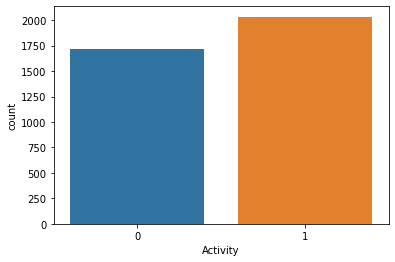

In [27]:
sns.countplot(x='Activity',data=train_data)

## Data Pre-processing

<b> Null values: </b>

In [20]:
data_null=pd.DataFrame(train_data.isnull().sum(),columns=['Number of null'])
data_null['percentage']=(train_data.isnull().sum())/len(train_data)*100
data_null

,Number of null,percentage
Activity,0,0.0
D1,0,0.0
D2,0,0.0
D3,0,0.0
D4,0,0.0
...,...,...
D1772,0,0.0
D1773,0,0.0
D1774,0,0.0
D1775,0,0.0


No null values found. So, no further processing needed here.

<b> Duplicate values: </b>

In [21]:
train_data.duplicated().sum()

0

No duplicate values found. So, no further processing needed here.

<b> Show input X and output y </b>

In [19]:
X=train_data.iloc[:,1:]
y=train_data.iloc[:,0]
key=X.keys()

In [20]:
X

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,...,0,0,0,0,0,0,0,0,0,0
3747,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,...,0,0,1,0,1,0,1,0,0,0
3748,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,...,0,0,0,0,0,0,0,0,0,0
3749,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.372936,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y

0       1
1       1
2       1
3       1
4       0
       ..
3746    1
3747    1
3748    0
3749    1
3750    0
Name: Activity, Length: 3751, dtype: int64

## Data Splitting

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,shuffle=True,random_state=33)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2813, 1776)
(2813,)
(938, 1776)
(938,)


## Decision Tree:

<b> Creating Model: </b>

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier model
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=33)

# Fit the model to the training data
DecisionTreeClassifierModel.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=20, random_state=33)

<b> Printing results: </b>

In [28]:
# Print the details
print('DecisionTreeClassifierModel Train Score is:', DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is:', DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel feature importances are:', DecisionTreeClassifierModel.feature_importances_)

DecisionTreeClassifierModel Train Score is: 0.9868467827941699
DecisionTreeClassifierModel Test Score is: 0.746268656716418
DecisionTreeClassifierModel feature importances are: [0.0023399 0.        0.        ... 0.        0.        0.       ]


## Random Forest:

<b> Creating Model: </b>

In [31]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=20,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=33)

<b> Printing results: </b>

In [32]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)

RandomForestClassifierModel Train Score is :  0.9996445076430857
RandomForestClassifierModel Test Score is :  0.7974413646055437
RandomForestClassifierModel features importances are :  [2.15894898e-03 6.02499898e-03 2.79765443e-03 ... 2.77379375e-05
 0.00000000e+00 1.27233025e-05]


## KNN:

<b> Creating Model: </b>

In [33]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 3,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

<b> Printing results: </b>

In [34]:
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))

KNNClassifierModel Train Score is :  0.8663348738002133
KNNClassifierModel Test Score is :  0.7356076759061834


## SVM:

<b> Creating Model: </b>

In [35]:
from sklearn.svm import SVC

# Create an SVC (Support Vector Classifier) model
SVMModel = SVC(kernel='rbf', C=1.0, random_state=33)

# Fit the model to the training data
SVMModel.fit(X_train, y_train)

SVC(random_state=33)

<b> Printing results: </b>

In [36]:
# Print the details
print('SVM Model Train Score:', SVMModel.score(X_train, y_train))
print('SVM Model Test Score:', SVMModel.score(X_test, y_test))

SVM Model Train Score: 0.8514041948098116
SVM Model Test Score: 0.7707889125799574


## XGBoost:

<b> Creating Model: </b>

In [1]:
!pip install xgboost

     |████████████████████████████████| 200.3 MB 33 kB/s              


In [23]:
import xgboost as xgb

# Create an XGBoost model
XGBModel = xgb.XGBClassifier(n_estimators=100, max_depth=3, random_state=33)

# Fit the model to the training data
XGBModel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=33, ...)

<b> Printing results: </b>

In [24]:
# Print the details
print('XGBoost Model Train Score:', XGBModel.score(X_train, y_train))
print('XGBoost Model Test Score:', XGBModel.score(X_test, y_test))

XGBoost Model Train Score: 0.9441876999644507
XGBoost Model Test Score: 0.7782515991471215


## Comparing the models:

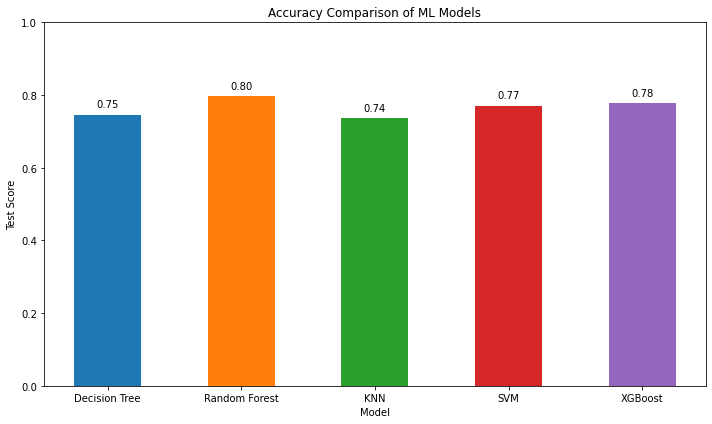

In [38]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding test scores
model_names = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGBoost']
test_scores = [DecisionTreeClassifierModel.score(X_test, y_test),
               RandomForestClassifierModel.score(X_test, y_test),
               KNNClassifierModel.score(X_test, y_test),
               SVMModel.score(X_test, y_test),
               XGBModel.score(X_test, y_test)]

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.bar(model_names, test_scores, color=colors, width=0.5)  # Adjust the bar width
plt.xlabel('Model')
plt.ylabel('Test Score')
plt.title('Accuracy Comparison of ML Models')

# Add data labels
for i, score in enumerate(test_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center')

plt.ylim(0, 1)  # Set the y-axis limits
plt.tight_layout()  # Adjust spacing between plot elements
plt.show()

So, comparing the 5 models, we can see that we got the best result with RF model with 80% acuracy in th test score. The second and third best models are the XGBoost and SVM models. 

## Prediction using the Best model (RF):

In [39]:
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [1 0 0 1 1 1 1 1 0 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.25166911 0.74833089]
 [0.845432   0.154568  ]
 [0.6227425  0.3772575 ]
 [0.24386897 0.75613103]
 [0.25       0.75      ]
 [0.23550421 0.76449579]
 [0.20079452 0.79920548]
 [0.35       0.65      ]
 [0.60413259 0.39586741]
 [0.66719742 0.33280258]]


In [46]:
y_test=RandomForestClassifierModel.predict(test_data)
y_prob=RandomForestClassifierModel.predict_proba(test_data)

In [47]:
prob=[]
for i,j in y_prob:
    if i>j:
        prob.append(i)
    else:
        prob.append(j)
prob   

[0.87,
 0.8491574025289778,
 0.6005487873660462,
 0.8895663082437276,
 0.842433874495155,
 0.6291666666666668,
 0.8919250719879218,
 0.6576276359600445,
 0.8488960820380705,
 0.5670433436532507,
 0.57,
 0.7445085470085471,
 0.6665324384787472,
 0.609767441860465,
 0.67,
 0.8572042370749757,
 0.7580118953510258,
 0.7,
 0.5286067222120109,
 0.8,
 0.7419344167304652,
 0.92,
 0.8384932461873638,
 0.91888310073531,
 0.79,
 0.6014314683840299,
 0.8430811335403727,
 0.6165851507286435,
 0.7526538036529334,
 0.5213274336625385,
 0.5847497695852535,
 0.8117638933349076,
 0.5558406662503512,
 0.5496178793006204,
 0.5154192546583851,
 0.967388888888889,
 0.8876543209876543,
 0.74,
 0.8996776212832551,
 0.8891574025289778,
 0.5625503663003663,
 0.8884882614980972,
 0.6595121951219513,
 0.8775138033394702,
 0.9226810777628063,
 0.638980459770115,
 0.8291574025289777,
 0.5485649122807018,
 0.9497539032749428,
 0.5693548387096774,
 0.8392054794520547,
 0.926692744875666,
 0.9449519230769231,
 0.83966

## Saving y_prob to csv file:

In [49]:
MoleculeId = list(range(1, test_data.shape[0]+1))
submission = pd.DataFrame(prob, columns=['PredictedProbability'])
submission['MoleculeId'] = MoleculeId

# Save the submission file inside the "bioresponse" folder
submission.to_csv('bioresponse/svm_benchmark.csv', index=False)

# Display the submission DataFrame
display(submission)

,PredictedProbability,MoleculeId
0,0.870000,1
1,0.849157,2
2,0.600549,3
3,0.889566,4
4,0.842434,5
...,...,...
2496,0.712727,2497
2497,0.793618,2498
2498,0.971738,2499
2499,0.584294,2500


## Summary:

Here, I have downloaded the 'Predicting a Biological Response' dataset from kaggle, analyzed it, pre-processed the data and then I created 5 models with 5 different algorithms- DT,RF,KNN,SVM and XGBoost. I calculated accuracy of the 5 models and comapared them. I found that Random Forest model achieved highest accuracy of 80% with its test data. So, I used this model for prediction in the next section. I precited the probablities and then saved them in a dataFrame and then finally I turned the dataFrame into a CSV file and saved it into the files section. 